# PyTorch

PyTorch is a Python based Scientific computing package that aims to replace Numpy with GPU accelerated processing and deep learning supportability.

In [1]:
# Coding examples from Learning PyTorch with Examples:  https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
# By Justin Johnson
# -*- coding: utf-8 -*-

import numpy as np
import torch

## Warm Up with Numpy

This example "use[s] numpy to fit a two-layer network to random data by manually implementing the forward and backward passes through the network using numpy operations".  The downside to Numpy is that it cannot utilize GPU for processing, which can provide more than 50x greater speeds. In this day in age, this just won't cut it.

This example fits a Numpy array to random data

In [3]:
# N is batch size; 
# D_in is input dimension;
# H is hidden dimension; 
# D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 38303959.2284
1 40378351.1328
2 48149750.7117
3 50865639.847
4 39758422.3635
5 21493187.506
6 8827390.97106
7 3704652.98755
8 2010497.92625
9 1393033.79907
10 1093397.07407
11 902718.025997
12 760969.307901
13 648616.80365
14 557245.845525
15 481747.6996
16 418665.622524
17 365567.53134
18 320610.657172
19 282332.829107


## Enter, the Tensor

In PyTorch, the Tensor is the same concept as an n-dimensional array in Numpy. Just as with Numpy Arrays, "Tensors do not know anything about deep learning or computational graphs or gradients; they are a generic tool for scientific computing". However, unlike Numpy Arrays, Tensors can be set to run their computations on a GPU, significantly increasing their performance run time.

This example fits a Tensor to random data using the cpu

In [6]:
# -*- coding: utf-8 -*-

dtype = torch.float
device = torch.device("cpu")
# dtype = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 35734444.0
1 33346854.0
2 30906950.0
3 25177594.0
4 17391906.0
5 10427849.0
6 5887842.0
7 3407454.75
8 2146017.25
9 1490931.75
10 1124132.875
11 896565.6875
12 740747.75
13 625323.875
14 535459.625
15 462932.40625
16 403074.03125
17 352935.21875
18 310495.84375
19 274367.84375


#### Lets get a better idea of how how some of the PyTorch options work step by step:

### Initializing Tensors

In [2]:
# Initialize empty matrix
x = torch.empty(5, 5)
print(x)

tensor(1.00000e-19 *
       [[ 0.0000,  0.0000,  0.0000,  0.0000,  3.8782],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  4.5427,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 4.5525,  0.0000,  0.0000,  0.0000,  0.0000]])


In [3]:
# Initialize zeros matrix
x = torch.zeros(5, 5, dtype=torch.long)
print(x)

tensor([[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])


In [4]:
# Initialize tensor from values
x = torch.tensor([77, 88, 99])
print(x)

tensor([ 77,  88,  99])


In [5]:
# Initialize tensor with ones matrix
x = x.new_ones(5, 5, dtype=torch.double) # new_* methods take sizes
print(x)
print()

# Initialize tensor based on properties of existing tensor
x = torch.rand_like(x, dtype=torch.float) # result is size, different dtype
print(x)
print()

print(x.size())

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]], dtype=torch.float64)

tensor([[ 0.1932,  0.4176,  0.0239,  0.0388,  0.5365],
        [ 0.5328,  0.1445,  0.3942,  0.2885,  0.9973],
        [ 0.7368,  0.5739,  0.0750,  0.5375,  0.3740],
        [ 0.8534,  0.9619,  0.9375,  0.9355,  0.0676],
        [ 0.6034,  0.0440,  0.0936,  0.2413,  0.5808]])

torch.Size([5, 5])


In [6]:
# Initialize Tensor from Numpy Array
arr = np.random.randn(5, 5)
x = torch.from_numpy(arr)
print(x)

tensor([[ 0.0372,  0.6937, -0.0965,  2.1075,  1.1878],
        [ 0.1984,  0.2474, -0.6758,  1.3382,  1.0436],
        [-0.4820,  0.3376, -0.5680,  2.3196,  0.6003],
        [ 1.4644,  0.7629,  0.2965,  0.7292,  1.3581],
        [ 0.1542, -0.4085, -1.8464, -0.1041, -1.5708]], dtype=torch.float64)


In [7]:
# Initialize random matrix
x = torch.rand(5, 5)
print(x)
print()

y = torch.rand(5, 5)
print(y)

tensor([[ 0.4444,  0.6191,  0.9130,  0.4938,  0.4915],
        [ 0.9329,  0.2400,  0.6411,  0.8263,  0.0228],
        [ 0.6181,  0.7702,  0.1993,  0.4941,  0.8141],
        [ 0.6699,  0.6697,  0.2152,  0.6695,  0.8976],
        [ 0.0485,  0.9176,  0.2382,  0.6507,  0.4524]])

tensor([[ 0.1685,  0.6385,  0.2971,  0.0941,  0.4613],
        [ 0.8412,  0.3417,  0.8658,  0.1413,  0.2904],
        [ 0.0719,  0.9992,  0.5678,  0.7456,  0.7585],
        [ 0.0007,  0.5560,  0.1690,  0.3195,  0.1652],
        [ 0.8884,  0.8409,  0.5978,  0.9368,  0.4663]])


### Operations on Tensors

See full list of PyTorch operations <a href="https://pytorch.org/docs/stable/torch.html">in the PyTorch documentation</a>

A few other interesting operations not speficially shown in code but to keep in mind for usefulness are:

-  ```torch.linspace()```/ ```torch.logspace()```
-  ```torch.chunk()```/```torch.split()```



In [8]:
# Adding Tensors (subtracting, dividing, multiplying...)
print(x + y)

# Addition as redirected output (out optional)
result = torch.empty(5, 5)
torch.add(x, y, out=result)
print(result)

# Addition in-place
# All in-place tensor operations are postfixed with _
y.add_(x)
print(y)

tensor([[ 0.6129,  1.2576,  1.2101,  0.5879,  0.9527],
        [ 1.7741,  0.5816,  1.5069,  0.9676,  0.3132],
        [ 0.6899,  1.7694,  0.7671,  1.2397,  1.5726],
        [ 0.6706,  1.2258,  0.3842,  0.9890,  1.0627],
        [ 0.9369,  1.7585,  0.8360,  1.5876,  0.9187]])
tensor([[ 0.6129,  1.2576,  1.2101,  0.5879,  0.9527],
        [ 1.7741,  0.5816,  1.5069,  0.9676,  0.3132],
        [ 0.6899,  1.7694,  0.7671,  1.2397,  1.5726],
        [ 0.6706,  1.2258,  0.3842,  0.9890,  1.0627],
        [ 0.9369,  1.7585,  0.8360,  1.5876,  0.9187]])
tensor([[ 0.6129,  1.2576,  1.2101,  0.5879,  0.9527],
        [ 1.7741,  0.5816,  1.5069,  0.9676,  0.3132],
        [ 0.6899,  1.7694,  0.7671,  1.2397,  1.5726],
        [ 0.6706,  1.2258,  0.3842,  0.9890,  1.0627],
        [ 0.9369,  1.7585,  0.8360,  1.5876,  0.9187]])


In [9]:
# Dividing Tensors (subtracting, dividing, multiplying...)
x = torch.rand_like(x, dtype=torch.double)
y = torch.rand_like(y, dtype=torch.double)
print(x / y)

# Dividing as redirected output (out optional)
result = torch.empty(5, 5, dtype=torch.double)
torch.div(x, y, out=result)
print(result)

# Dividing in-place
# All in-place tensor operations are postfixed with _
y.div_(x)
print(y)

tensor([[ 0.1651,  2.7955,  1.2352,  1.0041,  0.2279],
        [ 1.4417,  0.8184,  0.8399,  1.3184,  1.8047],
        [ 0.7821,  0.5868,  5.9166,  5.3607,  2.9490],
        [ 2.7442,  0.5378,  0.1804,  1.4286,  0.3348],
        [ 0.9844,  1.6003,  0.3651,  2.9033,  0.0472]], dtype=torch.float64)
tensor([[ 0.1651,  2.7955,  1.2352,  1.0041,  0.2279],
        [ 1.4417,  0.8184,  0.8399,  1.3184,  1.8047],
        [ 0.7821,  0.5868,  5.9166,  5.3607,  2.9490],
        [ 2.7442,  0.5378,  0.1804,  1.4286,  0.3348],
        [ 0.9844,  1.6003,  0.3651,  2.9033,  0.0472]], dtype=torch.float64)
tensor([[  6.0573,   0.3577,   0.8096,   0.9959,   4.3872],
        [  0.6936,   1.2219,   1.1906,   0.7585,   0.5541],
        [  1.2787,   1.7043,   0.1690,   0.1865,   0.3391],
        [  0.3644,   1.8596,   5.5442,   0.7000,   2.9866],
        [  1.0159,   0.6249,   2.7386,   0.3444,  21.2006]], dtype=torch.float64)


In [10]:
# Indexing (standard like Numpy with same features)
print(x[:,1])

tensor([ 0.4395,  0.7958,  0.4668,  0.5348,  0.7554], dtype=torch.float64)


In [11]:
# Return Tensor value of a 1 element Tensor
x = torch.rand(1)
print(x)
print(x.item())

tensor([ 0.6291])
0.6291062831878662


### Autograd

Central to all neural networks in PyTorch is the ```autograd``` package. ```autograd``` provides automatic differentiation for all opertions on Tensors; it's a define-by-run framework. That means; *your backdrop is defined by how your code is run, and each iteration can be different*.

-  ```torch.Tensor``` is the central class of the package
-  Setting ```requires_grad()``` as True from the ```autgrad``` package begins to track all operations on it.
-  When computations are completed, ```backward()``` can be called
  -  All gradients will be computed automatically, and accumulated into the ```.grad``` attribute
-  To stop a tensor from tracking history, call ```detach()```
  -  To prevent history tracking all together, wrap code in ```with torch.no_grad():```
-  Lastly, ```Function``` is interconnected with ```Tensor``` and builds an acyclic graph that encodes a complete history of computations.
  - Each variable has a ```grad_fn``` attribute that references a ```Function``` that has created then ```Tensor``` (except those created by the user, those return ```None```)

In [97]:
# Implement Tensor with Autograd
x = torch.rand(5, 5, requires_grad=True) * 10
print(x)
print(x.grad_fn)

tensor([[ 7.2257,  7.9758,  7.5907,  7.8125,  5.4493],
        [ 7.1704,  0.7893,  0.2862,  7.1327,  9.4572],
        [ 5.2033,  5.4396,  1.8589,  4.2606,  1.1723],
        [ 6.2957,  4.0885,  2.3277,  2.0547,  6.6105],
        [ 4.4182,  8.2643,  0.1110,  1.6118,  1.7248]])


In [98]:
# Quick and Dirty Example
# requires_grad() changes an existing Tensors requires_grad() flag in place
# Defaults to True if not already given
a = torch.ones(5, 5)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True) #In-place mutation must contain _
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn) # Output from operations contain grad_fn (mutation that occured)

False
True


In [99]:
# Perform operation on Autograd Tensor
y = x - 2
print(y)
print(y.grad_fn)

tensor([[ 5.2257,  5.9758,  5.5907,  5.8125,  3.4493],
        [ 5.1704, -1.2107, -1.7138,  5.1327,  7.4572],
        [ 3.2033,  3.4396, -0.1411,  2.2606, -0.8277],
        [ 4.2957,  2.0885,  0.3277,  0.0547,  4.6105],
        [ 2.4182,  6.2643, -1.8890, -0.3882, -0.2752]])


In [100]:
# More test operations on the Autograd Tensor
z = y * y / 3
out = z.mean() # Scaler: single value
print(z, out)
print(z.grad_fn)
print(out.grad_fn)

tensor([[ 9.1026e+00,  1.1903e+01,  1.0419e+01,  1.1262e+01,  3.9660e+00],
        [ 8.9110e+00,  4.8861e-01,  9.7904e-01,  8.7815e+00,  1.8537e+01],
        [ 3.4204e+00,  3.9435e+00,  6.6345e-03,  1.7034e+00,  2.2834e-01],
        [ 6.1511e+00,  1.4539e+00,  3.5801e-02,  9.9642e-04,  7.0855e+00],
        [ 1.9492e+00,  1.3081e+01,  1.1895e+00,  5.0228e-02,  2.5252e-02]]) tensor(4.9870)


### Gradient

Now is a good time go go ahead and **backprop** using ```out.backward()```, because ```out``` contains a single scalar, ```out.backward()```, equivalent to ```out.backward(torch.tensor(1.0))```

In [112]:
#  Gradient computation flushes all internal buffers
# If you want to do backward computation twice,
# retain_graph = True must be set on first pass
out.backward(retain_graph=True)

In [115]:
# This shouldn't be none...
print(x.grad)

None


In [116]:
# Non-Scalar Gradients
x = torch.rand(2, 2, requires_grad=True)
y = x + 2
y.backward(torch.rand(2, 2), retain_graph=True)
print(x.grad)

tensor([[ 0.9192,  0.2212],
        [ 0.5697,  0.6170]])


In [117]:
z = y * y
gradient = torch.rand(2, 2)
y.backward(gradient)
print(x.grad)

tensor([[ 1.5709,  0.6285],
        [ 1.0030,  1.4115]])


## Neural Networks

-  ```torch.nn``` handles constructing neural networks
  -  Reliant on the ```autograd``` package in order to do so 
-  ```nn.Module``` contains layers, and a method ```forward(input)``` that returns the ```output```
- ```torch.nn``` only supports mini batches of samples, not single samples

A typical feed forward training procedure for a neural network might look like:

-  Definine the neural network that has some learnable parameters (or weights)
-  Iterate over a dataset of inputs
-  Process input through the network
-  Compute the loss (how far is the output from being correct)
-  Propage the gradients back into the networks parameters
- Update the weights of the network, typically using a simple update rule:
<b>
```weight = weight - learning_rate * gradient```

In [1]:
# Sample Neural Network (Convolutional: CNN)

# Import modules
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE
%matplotlib inline

class CNN(nn.Module):      # Inherit nn.Module
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential (                   # Input Shape: MNIST (1, 28, 28) [dataset dependent]
                nn.Conv2d(
                    in_channels=1                       # input height
                  , out_channels=16                     # n filters
                  , kernel_size=5                       # filter size
                  , stride=1                            # filter movement/step
                  , padding=2                           # if we want same W & L after con2d, padding = (kernel_size-1) / 2
                ),                                      # output shape (16, 28, 28)
                nn.ReLU(),                              # Activation function
                nn.MaxPool2d(kernel_size=2)             # Max value in 2 x 2 area, output shape (16, 14 , 14)
            )
        
        self.conv2 = nn.Sequential(                    # Input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2)                 # Output shape (32, 14, 14)
          , nn.ReLU()                                  # Activation Function
          , nn.MaxPool2d(2)                            # Output Shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)           # Fully connected layer, output 10 classes
            
    def forward(self, x):                              # backward() is defined in autograd
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)                      # Flatten output to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x
        
    def num_flat_features(self, x):
        size = x.size()[1:]                        # all dimensions except batch
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

### Train Sample Data

In [25]:
# Hyper parameters
EPOCH = 1                                        # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LEARNING_RATE = .001 
DOWNLOAD_MNIST = False

try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')

# MNIST is a handwriting image sample library of characters    
# Check for MNIST Digits Dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    DOWNLOAD_MNIST=True
    
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                   # Converts PIL Image to np.array
    transform=torchvision.transforms.ToTensor(),  # to torch.float for shape (C x H x W)
    download=DOWNLOAD_MNIST
)

In [26]:
# Data loader for mini-batch return in training
# Batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# Select 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.
test_y = test_data.test_labels[:2000]

train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor)[:2000] / 255.
train_y = train_data.train_labels[:2000]

torch.Size([60000, 28, 28])
torch.Size([60000])


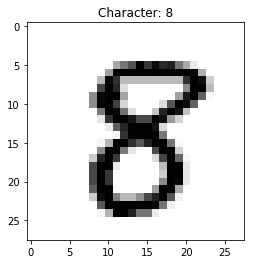

In [27]:
# Plot a sample data point
print(train_data.train_data.size())
print(train_data.train_labels.size())
char = 333
plt.imshow(train_data.train_data[char].numpy(), cmap='binary')
plt.title('Character: %i' % train_data.train_labels[char])
plt.show()

### Create CNN Model

In [28]:
# Create Neural Network Model
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [29]:
# Learnable Parameters of the Neural Network Model
print(cnn.parameters())
params = list(cnn.parameters())
print(len(params)
    , params[0].size())  # conv1 .weight

<generator object Module.parameters at 0x00000156A1223C50>
6 torch.Size([16, 1, 5, 5])


### Loss Function

In [30]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)  # optimize cnn parameters
loss_func = nn.CrossEntropyLoss()                                 # target label is not one-hotted

### Neural Net Visualization

In [39]:
def cnn_plot(lowDweights, labels):
    plt.cla()
    x, y = lowDweights[:,0], lowDweights[:,1]
    for X, Y, S in zip(x, y, labels):
        c = cm.Spectral(int(255 * S / 9))
        plt.text(X, Y, S, backgroundcolor=c, fontsize=9)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    plt.title('Vizualize Last Layer')
    plt.show()
    plt.pause(.01)

Epoch:  0 | train loss: 0.0177 | test accuracy: 0.08


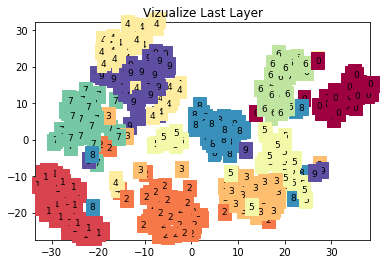

Epoch:  0 | train loss: 0.0378 | test accuracy: 0.08


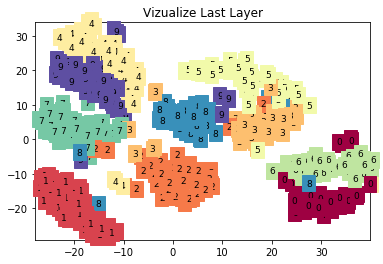

Epoch:  0 | train loss: 0.1146 | test accuracy: 0.08


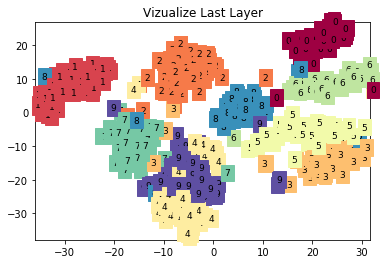

Epoch:  0 | train loss: 0.0127 | test accuracy: 0.08


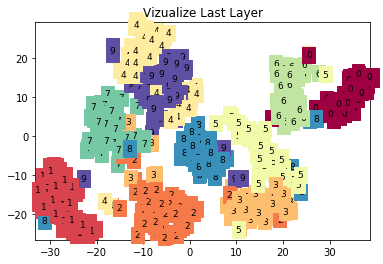

Epoch:  0 | train loss: 0.0337 | test accuracy: 0.09


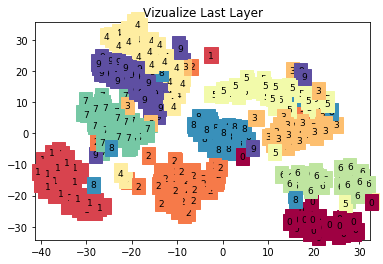

Epoch:  0 | train loss: 0.1106 | test accuracy: 0.08


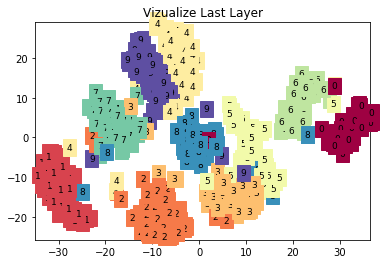

Epoch:  0 | train loss: 0.0136 | test accuracy: 0.09


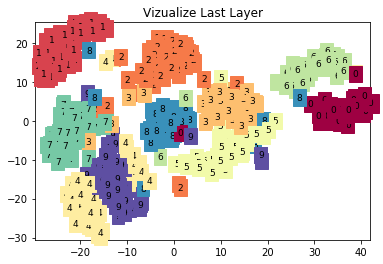

Epoch:  0 | train loss: 0.0318 | test accuracy: 0.08


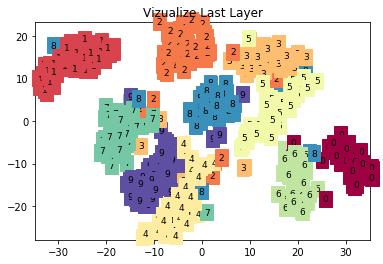

Epoch:  0 | train loss: 0.0180 | test accuracy: 0.08


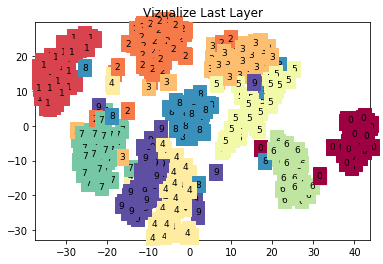

Epoch:  0 | train loss: 0.0351 | test accuracy: 0.08


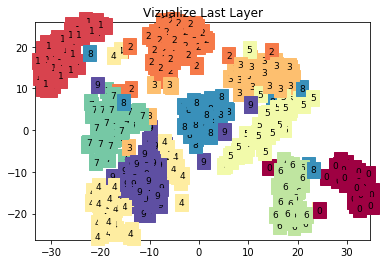

Epoch:  0 | train loss: 0.0103 | test accuracy: 0.09


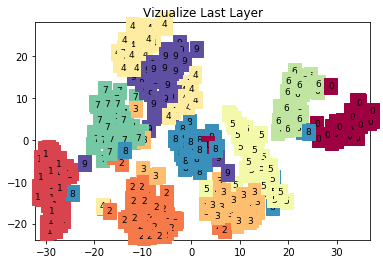

Epoch:  0 | train loss: 0.0043 | test accuracy: 0.08


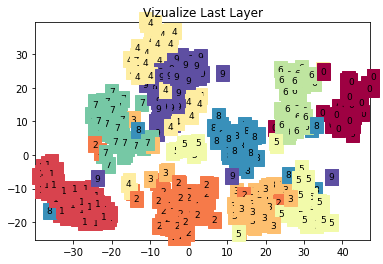

Epoch:  0 | train loss: 0.0639 | test accuracy: 0.08


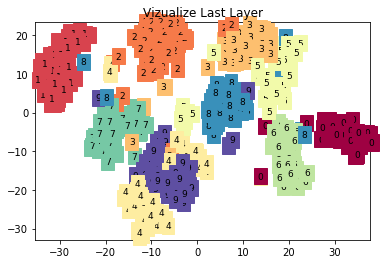

Epoch:  0 | train loss: 0.0459 | test accuracy: 0.08


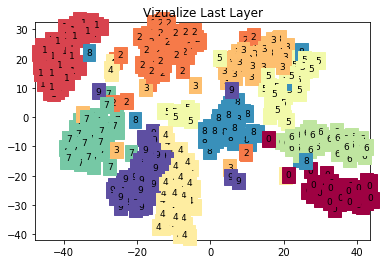

Epoch:  0 | train loss: 0.0120 | test accuracy: 0.09


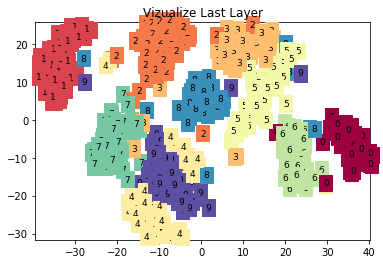

Epoch:  0 | train loss: 0.0063 | test accuracy: 0.09


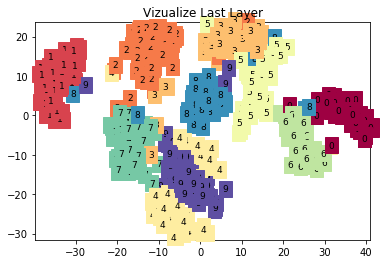

Epoch:  0 | train loss: 0.0134 | test accuracy: 0.08


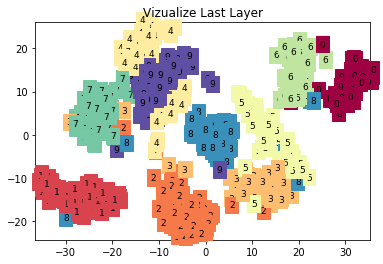

Epoch:  0 | train loss: 0.0322 | test accuracy: 0.09


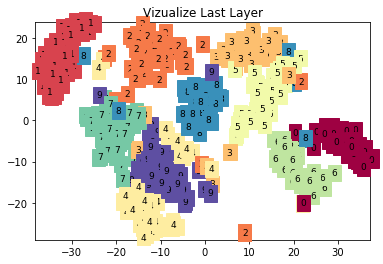

Epoch:  0 | train loss: 0.0359 | test accuracy: 0.09


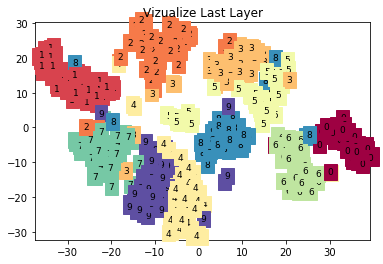

Epoch:  0 | train loss: 0.0168 | test accuracy: 0.09


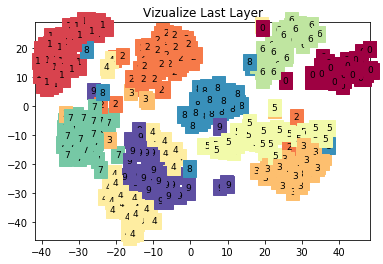

Epoch:  0 | train loss: 0.0135 | test accuracy: 0.09


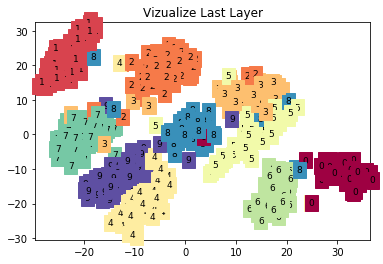

Epoch:  0 | train loss: 0.0122 | test accuracy: 0.09


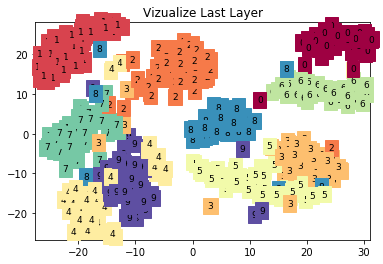

Epoch:  0 | train loss: 0.0603 | test accuracy: 0.08


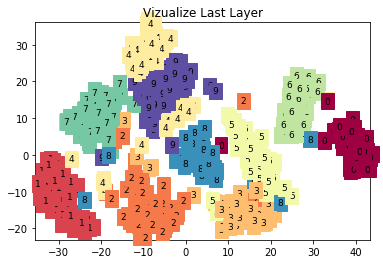

Epoch:  0 | train loss: 0.0768 | test accuracy: 0.08


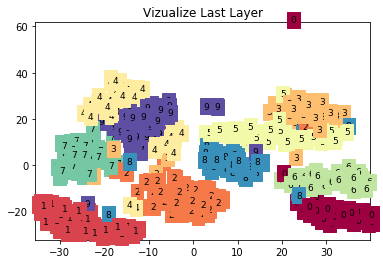

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9] real number


In [41]:
plt.ion()

for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):    # gets batch data, normalize x when iterating train_loader
        output = cnn(b_x)[0]                            # cnn output
        loss = loss_func(output, b_y)                   # cross entropy loss (could aslo be something like MSE)
        optimizer.zero_grad()                           # clear gradients
        loss.backward()                                 # backprops and computes gradients
        optimizer.step()                                # apply gradients
        
        if step % BATCH_SIZE == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = float(sum(pred_y == test_y)) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                cnn_plot(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:100])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:100].numpy(), 'real number')